In [2]:
!pip install fastbook

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 18.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 23.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 54.6 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.2 requires fsspec==2025.3.2, but you have fsspec 2024.12.0 which is incompatible.


In [3]:
from fastbook import *

In [4]:
urls = search_images_ddg('bird photos', max_images=1)
len(urls),urls[0]

(1, 'https://wallpapercave.com/wp/wp2284850.jpg')

In [5]:
dest = Path('bird.jpg')
if not dest.exists():download_url(urls[0], dest, show_progress=False)

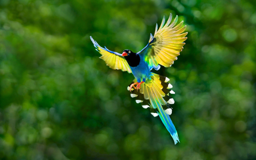

In [6]:
im = Image.open(dest)
im.to_thumb(256, 256)

In [7]:
from duckduckgo_search import DDGS

from fastcore.all import *
def search_images(keywords, max_images = 30):
    print(f"Searching for {keywords}")
    return L(DDGS().images(keywords,max_results=max_images)).itemgot('image')

In [8]:
searches = 'forest', 'bird'
path = Path('bird_or_not')

if not path.exists():
  parent = (path)
  parent.mkdir(exist_ok=True)
  for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True)
    results = search_images_ddg(f'{o} photo')
    download_images(dest, urls=results[:200])
    resize_images(dest, max_size=400, dest=dest)


In [9]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink);

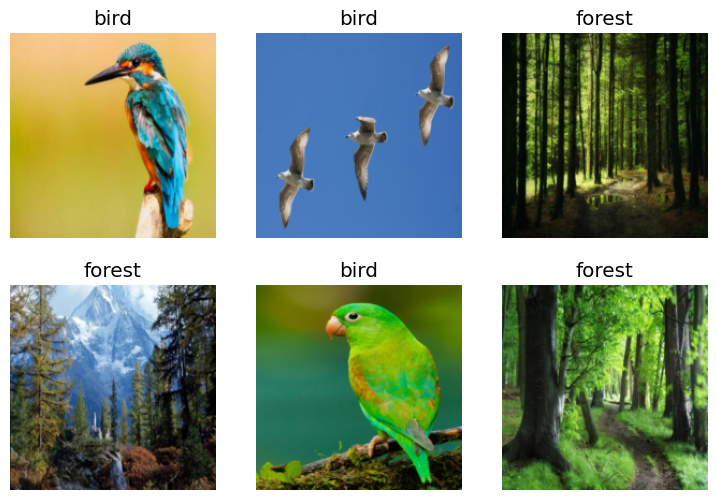

In [10]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path)
dls.show_batch(max_n=6)

In [11]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

/usr/local/lib/python3.11/dist-packages/fastai/vision/learner.py:303: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 73.0MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,1.185297,0.691767,0.194444,00:51


epoch,train_loss,valid_loss,error_rate,time
0,0.151405,0.073211,0.013889,01:07
1,0.116442,0.075755,0.041667,01:09
2,0.088267,0.073155,0.041667,01:05


In [13]:
is_bird,_,probs = learn.predict(PILImage.create('bird.jpg'))
print(f"This is a : {is_bird}.")
print(f"Probablitiy it's a bird: {probs[0]:4f}")

is_bird,_,probs = learn.predict(PILImage.create('forest.jpeg'))
print(f"This is a : {is_bird}.")
print(f"Probablitiy it's a bird: {probs[0]:4f}")

This is a : bird.
Probablitiy it's a bird: 0.999986


This is a : forest.
Probablitiy it's a bird: 0.000197
